# Essentials

## import packages

In [1]:
import numpy as np
import idx2numpy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

from functions.layers import *
from functions.model import Main_Model
from functions.plot_graph import *

# Model creation

## import data

In [2]:
# # data = pd.read_csv("train.csv").sample(frac=.05).to_numpy()
# X = idx2numpy.convert_from_file('D:\\Programming\\Projects\\data_sets\\num_mnist_X.idx3-ubyte').astype('float32')
# Y = idx2numpy.convert_from_file('D:\\Programming\\Projects\\data_sets\\num_mnist_Y.idx1-ubyte')

# X = X.reshape(-1, 1, 28, 28)

# # minmax
# X = (X - np.min(X, axis=(2,3), keepdims=True)) / (np.max(X, axis=(2,3), keepdims=True) - np.min(X, axis=(2,3), keepdims=True))

# # Z-score
# # X = (X - np.mean(X, axis=(2,3), keepdims=True)) / np.var(X, axis=(2,3), keepdims=True)

# Y_onehot = OneHotEncoder().fit_transform(Y.reshape(-1, 1)).toarray()

# X_train, X_test, y_train, y_test = train_test_split(X, Y_onehot, test_size=0.05, random_state=101)

# percent = 0.1
# sample = np.random.choice([True, False], size=X_test.shape[0], p=[percent, 1-percent])
# X_val = X_test[sample]
# y_val = y_test[sample]

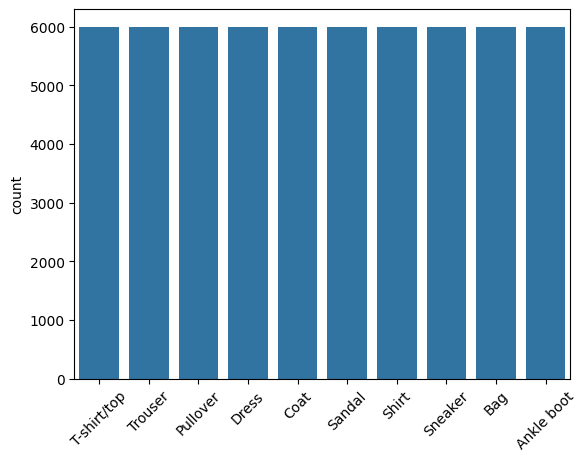

In [3]:
# All possible categories
labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

# import train data
X_train = idx2numpy.convert_from_file('.\Fashion_MNIST\TrainX').astype('float32')
y_train = idx2numpy.convert_from_file('.\Fashion_MNIST\TrainY').reshape(-1, 1)

# import test data
X_test = idx2numpy.convert_from_file('.\Fashion_MNIST\TestX').astype('float32')
y_test = idx2numpy.convert_from_file('.\Fashion_MNIST\TestY').reshape(-1, 1)

# reshape to needed format
X_train, X_test = X_train.reshape(-1, 1, 28, 28), X_test.reshape(-1, 1, 28, 28)

# minmax normalization
X_max, X_min = np.max(X_train), np.min(X_train)
X_train = (X_train - X_min) / (X_max - X_min)
X_test = (X_test - X_min) / (X_max - X_min)

# shuffle train data
shuffled_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffled_indices]
y_train = y_train[shuffled_indices]

# extracting unique categories with indices
unique_vals, indices = np.unique(y_train, return_index=True)

# Z-score normalization
# X_mean, X_std = np.mean(X_train), np.std(X_train), 
# X_train = (X_train - X_mean)/X_std
# X_test = (X_test - X_mean)/X_std

# PDF of the train data
sns.countplot(x=y_train.flatten())
plt.xticks(ticks=np.arange(10), labels=list(labels.values()), rotation=45)

# One-Hot encoding
OneHot = OneHotEncoder(sparse_output=False).fit(y_train)
y_train_OH = OneHot.transform(y_train)
y_test_OH = OneHot.transform(y_test)

# extract some data for validation
percent = 0.01
sample = np.random.choice([True, False], size=X_test.shape[0], p=[percent, 1-percent])
X_val = X_test[sample]
y_val = y_test_OH[sample]

### example of each type of clothe

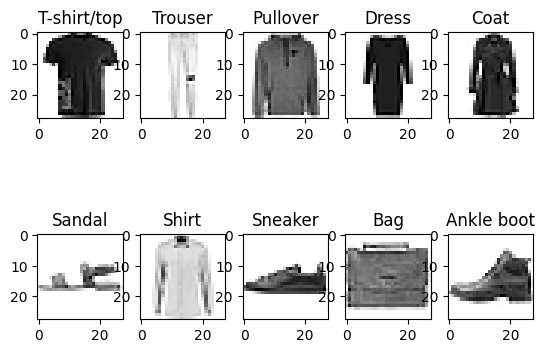

In [4]:
fig, axs = plt.subplots(2,5)

for i, idx in enumerate(indices):
    axs[np.unravel_index(i, shape=(2,5))].imshow(X_train[idx, 0], cmap='Greys')
    axs[np.unravel_index(i, shape=(2,5))].title.set_text(labels.get(y_train[idx, 0]))

## training

In [ ]:
# # creating layers
# layers = [
#     Conv(num_filters=42, size=5, stride=1, activation='relu'),
#     MaxPool(size=2, stride=2),
#     FCL(n_inputs=6048, n_neurons=300, activation='relu'),
#     FCL(n_inputs=300, n_neurons=10, activation='softmax'),
# ]

# # create CNN model
# CNN = Main_Model(layers)

# # set early stop params
# CNN.EarlyStop(monitor = "loss", min_delta = 2e-3, min_monitor=0.3, patience = 5, restore_best_layers=True)

# # start training
# val_step = 5000
# step = 5
# CNN.train(X_train, y_train_OH, epochs=1, learning_rate=0.01, lr_decay=0.001, step=step, val_step=val_step)

In [ ]:
CNN = Main_Model(file2load='82AccModel')

In [ ]:
# CNN.save_model('temp')

In [ ]:
# CNN.restore_best_layers()

## Graphs

In [6]:
X_axis = list( range(len(CNN.history['loss'][0]) ) )
show_graph(X=X_axis, array_acc=CNN.history['loss'][0], label='loss', smooth=0, title='avg loss per image pack', xaxis_label='image pack', yaxis_label='loss')

In [ ]:
# show_graph_with_val(X_axis, CNN.history['accuracy'], CNN.history['val_accuracy'], 'accuracy', 'val_accuracy', 2, 0.1, 'avg accuracy per image pack', 'image pack', 'accuracy')

In [ ]:
# show_graph(X_axis, CNN.history['loss'], CNN.history['val_loss'], 'loss', 'val_loss', 18, 1, 'loss per image pack', 'image pack', 'loss')

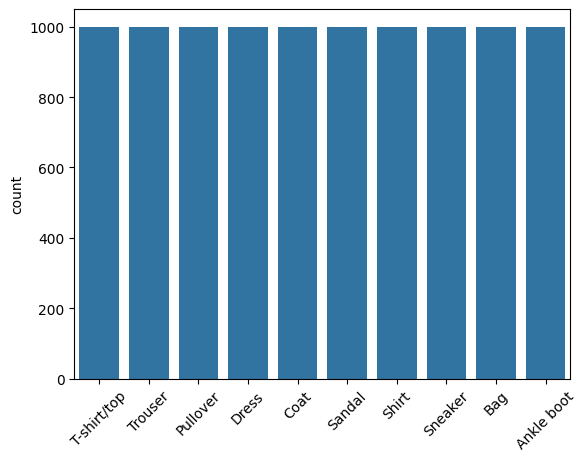

In [26]:
sns.countplot(x=y_test.flatten())
plt.xticks(ticks=np.arange(10), labels=list(labels.values()), rotation=45)
plt.show()

In [27]:
correctly_predicted = []
accuracies = []

for i in range(10):
    X_test_class = X_test[y_test.flatten() == i]
    predictions = CNN.predict(X_test_class)
    correctly_predicted.append(np.sum(predictions == i))
    accuracies.append(correctly_predicted[-1] / len(predictions))
    
correctly_predicted, accuracies = np.array(correctly_predicted), np.array(accuracies)

In [28]:
show_bar(list(labels.values()), accuracies, 'Accuracy on each clothe type, %', 'Clothe', 'Accuracy, [%]')

In [29]:
np.sum(accuracies)/10

0.8204

# MLP

In [ ]:
# create layers
layers = [
    FCL(n_inputs=784, n_neurons=64, activation='relu'),
    FCL(n_inputs=64, n_neurons=32, activation='relu'),
    FCL(n_inputs=32, n_neurons=10, activation='softmax'),
]

# create model
MLP = Main_Model(layers)

# set early stop params
MLP.EarlyStop(monitor = "val_accuracy", min_delta = 1e-3, min_monitor=0.8, patience = 5, restore_best_layers=True)

# training
val_step = 10000
step = 10
MLP.train(X_train, y_train_OH, X_val, y_val, epochs=5, learning_rate=0.01, lr_decay=0.0001, step=step, val_step=val_step)

In [ ]:
# MLP.restore_best_layers()

In [ ]:
X_axis = list( range( len(MLP.history['accuracy'][0]) ) )

show_graph(X_axis, MLP.history['accuracy'], MLP.history['val_accuracy'], 'accuracy', 'val_accuracy', 45, 0.3, 'avg accuracy per image pack', 'image pack', 'accuracy')

In [ ]:
show_graph(X_axis, MLP.history['loss'], MLP.history['val_loss'], 'loss', 'val_loss', 375, 5, 'loss per image pack', 'image pack', 'loss')

In [ ]:
# predictions = MLP.predict(X_test)
# accuracy_score(np.argmax(y_test[:1000], 1), predictions)

In [ ]:
correctly_predicted = []
accuracies = []

for i in range(10):
    X_test_class = X_test[y_test.flatten() == i]
    predictions = MLP.predict(X_test_class)
    correctly_predicted.append(np.sum(predictions == i))
    accuracies.append(correctly_predicted[-1] / len(predictions))
    
correctly_predicted, accuracies = np.array(correctly_predicted), np.array(accuracies)

In [ ]:
show_bar(list(labels.values()), accuracies, 'Accuracy on each clothe type, %', 'Clothe', 'Accuracy, [%]')

In [ ]:
np.sum(accuracies)/10

# Keras CNN

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

In [ ]:
X_train, X_test = X_train.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(5, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(10, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(
    optimizer=SGD(
        learning_rate=0.01), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

training_history = model.fit(
    X_train, y_train_OH, 
    validation_data=(X_val, y_val), 
    epochs=1, batch_size=1
)

loss, accuracy = model.evaluate(X_test, y_test_OH)